In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datafilter/AllDataFiltered.csv


In [10]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
posts = pd.read_csv('/kaggle/input/datafilter/AllDataFiltered.csv')
posts

ModelDataFiltered=posts
flair_categories = ["admissions", "academics", "student life", "advice", "discussion", "meme", "rant", "psa", "event", "poll"]
ModelDataFiltered


,combined_text,link_flair_text
0,"for everyone, whether you're worried about cov...",psa
1,and people wonder why the virus spreads…,rant
2,r/udub mods,meme
3,thoughts on madrona? i have an emotional suppo...,discussion
4,soc 222 anyone has took or taking soc222(socio...,academics
...,...,...
10579,uw or cwru (case western) for pre med? pre-med...,advice
10580,"uw religious studies courses hi, entering uw w...",academics
10581,spanish requirements changing? i’m a prospect...,academics
10582,anyone going to seattle international film fes...,discussion


In [12]:

def clean_tokenize(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

ModelDataFiltered['tokens'] = ModelDataFiltered['combined_text'].apply(clean_tokenize)



In [14]:
bow = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=5000)
texts_bow = bow.fit_transform(ModelDataFiltered['tokens'])

kmeans = KMeans(n_clusters=10, random_state=0)
ModelDataFiltered['cluster'] = kmeans.fit_predict(texts_bow)

cluster_centers = kmeans.cluster_centers_



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


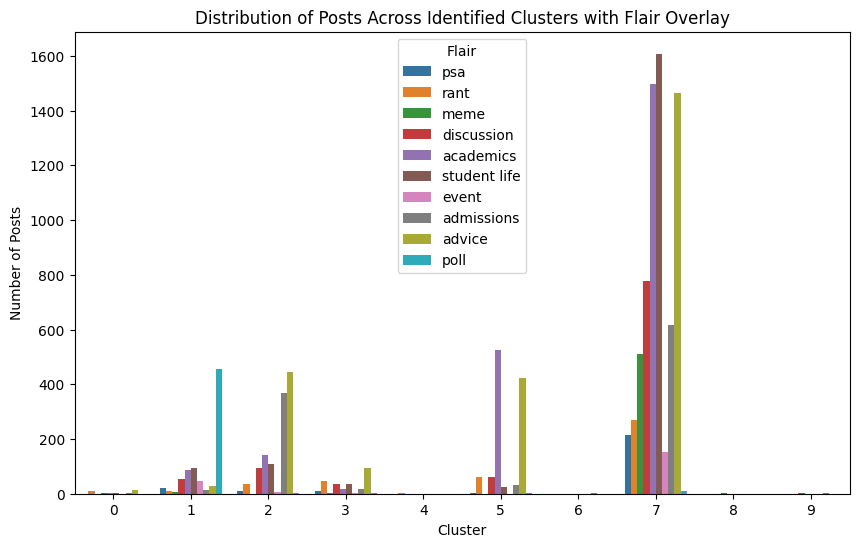

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ModelDataFiltered, x='cluster', hue='link_flair_text')
plt.title('Distribution of Posts Across Identified Clusters with Flair Overlay')
plt.xlabel('Cluster')
plt.ylabel('Number of Posts')
plt.legend(title='Flair', loc='upper center')
plt.show()